In [1]:
import numpy as np
import torch
import nibabel as nib 
import nilearn as nil
from nilearn import image
from models import Parellel_Renorm_Dynamic,normalize_3d,scale_calculate
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting
from nilearn.maskers import NiftiLabelsMasker
import os
from tqdm import tqdm
#The method to import data
from nilearn import datasets
from scipy.stats import sem
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
#Whether to use cuda or not
use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')

colors = ['#F4F1DE','#DF7A5E','#3C405B','#82B29A','#F2CC8E']

# Experimental Results

In [2]:

#Load all of these data and draw Visulize plots
#loss_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_schaefer_cut=1.9_hidden=256_parallel_training=800/Losses_kde.npy')
#EIs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_schaefer_cut=1.9_hidden=256_parallel_training=800/EIs_kde.npy')
CEs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_schaefer_cut=1.9_hidden=256_parallel_training=800/CEs_kde.npy')
#Load all of these data and draw Visulize plots
CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=1_training=800/CEs_kde.npy')
CEs_array_NIS_plus3=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=3_training=800/CEs_kde.npy')
CEs_array_NIS_plus7=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=7_training=800/CEs_kde.npy')
CEs_array_NIS_plus14=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=14_training=800/CEs_kde.npy')
CEs_array_NIS_plus27=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=27_training=800/CEs_kde.npy')
CEs_array_NIS_plus52=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=52_training=800/CEs_kde.npy')


In [3]:
"""
#Load all of these data and draw Visulize plots
CEs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_schaefer_cut=1.9_hidden=256_parallel_training=800/CEs_kde.npy')
#Load all of these data and draw Visulize plots
EIs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=1_training=800/EIs_kde.npy')
EIs_array_NIS_plus3=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=3_training=800/EIs_kde.npy')
EIs_array_NIS_plus7=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=7_training=800/EIs_kde.npy')
EIs_array_NIS_plus14=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=14_training=800/EIs_kde.npy')
EIs_array_NIS_plus27=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=27_training=800/EIs_kde.npy')
EIs_array_NIS_plus52=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=52_training=800/EIs_kde.npy')
EIs_array_NIS_plus100=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=100_training=800/EIs_kde.npy')
"""

"\n#Load all of these data and draw Visulize plots\nCEs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_schaefer_cut=1.9_hidden=256_parallel_training=800/CEs_kde.npy')\n#Load all of these data and draw Visulize plots\nEIs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=1_training=800/EIs_kde.npy')\nEIs_array_NIS_plus3=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=3_training=800/EIs_kde.npy')\nEIs_array_NIS_plus7=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=7_training=800/EIs_kde.npy')\nEIs_array_NIS_plus14=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=14_training=800/EIs_kde.npy')\nEIs_array_NIS_plus27=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=27_training=800/EIs_kde.npy')\nEIs_array_NIS_plus52=np.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=52_training=800/EIs_kde.npy')\nEIs_array_NIS_plus100=np

In [4]:
"""
CEs_array_NIS_plus1=EIs_array_NIS_plus1-EIs_array_NIS_plus100[:,0][:,np.newaxis]
CEs_array_NIS_plus3=EIs_array_NIS_plus3-EIs_array_NIS_plus100[:,0][:,np.newaxis]
CEs_array_NIS_plus7=EIs_array_NIS_plus7-EIs_array_NIS_plus100[:,0][:,np.newaxis]
CEs_array_NIS_plus14=EIs_array_NIS_plus14-EIs_array_NIS_plus100[:,0][:,np.newaxis]
CEs_array_NIS_plus27=EIs_array_NIS_plus27-EIs_array_NIS_plus100[:,0][:,np.newaxis]
CEs_array_NIS_plus52=EIs_array_NIS_plus52-EIs_array_NIS_plus100[:,0][:,np.newaxis]
"""

'\nCEs_array_NIS_plus1=EIs_array_NIS_plus1-EIs_array_NIS_plus100[:,0][:,np.newaxis]\nCEs_array_NIS_plus3=EIs_array_NIS_plus3-EIs_array_NIS_plus100[:,0][:,np.newaxis]\nCEs_array_NIS_plus7=EIs_array_NIS_plus7-EIs_array_NIS_plus100[:,0][:,np.newaxis]\nCEs_array_NIS_plus14=EIs_array_NIS_plus14-EIs_array_NIS_plus100[:,0][:,np.newaxis]\nCEs_array_NIS_plus27=EIs_array_NIS_plus27-EIs_array_NIS_plus100[:,0][:,np.newaxis]\nCEs_array_NIS_plus52=EIs_array_NIS_plus52-EIs_array_NIS_plus100[:,0][:,np.newaxis]\n'

In [5]:
#scale=['52','27','14','7','3','1']
scale=['1','3','7','14','27','52']
CE_mean_NIS=CEs_array_NIS[-20:,1:].mean(0)
CE_std_NIS=CEs_array_NIS[-20:,1:].std(0)
CE_mean_NIS_plus1=CEs_array_NIS_plus1[-10:,1:].mean(0)
CE_std_NIS_plus1=CEs_array_NIS_plus1[-10:,1:].std(0)
CE_mean_NIS_plus3=CEs_array_NIS_plus3[-10:,1:].mean(0)
CE_std_NIS_plus3=CEs_array_NIS_plus3[-10:,1:].std(0)
CE_mean_NIS_plus7=CEs_array_NIS_plus7[-10:,1:].mean(0)
CE_std_NIS_plus7=CEs_array_NIS_plus7[-10:,1:].std(0)
CE_mean_NIS_plus14=CEs_array_NIS_plus14[-10:,1:].mean(0)
CE_std_NIS_plus14=CEs_array_NIS_plus14[-10:,1:].std(0)
CE_mean_NIS_plus27=CEs_array_NIS_plus27[-10:,1:].mean(0)
CE_std_NIS_plus27=CEs_array_NIS_plus27[-10:,1:].std(0)
CE_mean_NIS_plus52=CEs_array_NIS_plus52[-10:,1:].mean(0)
CE_std_NIS_plus52=CEs_array_NIS_plus52[-10:,1:].std(0)

# 创建柱状图
fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)

# 设置柱状图的位置和宽度
bar_positions = np.arange(6)
bar_width = 0.4

# 使用seaborn库的color_palette函数设置配色
#colors = sns.color_palette('pastel', n_colors=2)

# 画柱状图，将颜色参数设置为colors
bars = ax.bar(bar_positions-0.2, CE_mean_NIS[::-1], width=bar_width, color=colors[1], yerr=CE_std_NIS[::-1], capsize=10)
bars = ax.bar(bar_positions[0]+0.2, CE_mean_NIS_plus1[-1], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus1[-1],capsize=10)
bars = ax.bar(bar_positions[1]+0.2, CE_mean_NIS_plus3[-2], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus3[-2],capsize=10)
bars = ax.bar(bar_positions[2]+0.2, CE_mean_NIS_plus7[-3], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus7[-3],capsize=10)
bars = ax.bar(bar_positions[-3]+0.2, CE_mean_NIS_plus27[2], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus27[2],capsize=10)
bars = ax.bar(bar_positions[-2]+0.2, CE_mean_NIS_plus27[1], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus27[1],capsize=10)
bars = ax.bar(bar_positions[-1]+0.2, CE_mean_NIS_plus52[0], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus52[0],capsize=10)

# 添加坐标轴标签
#ax.set_xlabel('scale',size=14)
#ax.set_ylabel(r'$\mathcal{J}$',size=14)

# 添加刻度标签
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

ax.set_xticks(bar_positions)
ax.set_xticklabels(scale)

plt.legend(['NIS','NIS+'])
plt.xlabel('scale',fontsize=15)
#plt.ylabel(r'$\Delta\mathcal{J}$', fontsize=15)

# 显示图形
plt.show()

# Validation Loss

In [2]:
#Lode the data and the model
torch.cuda.empty_cache()
data=np.load('Preprocessed_files/AOMIC_preprocessed_schaefer_100.npy',allow_pickle=True)
data=normalize_3d(data)
data=torch.tensor(data,device=device).to(torch.float32)
#Make a net
net = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=1.9, hidden_units = 256, normalized_state = True,device=device)
#Load the net parameters
#net.load_state_dict(torch.load('data/AOMIC_resample_aal_model76000.pkl',map_location=device))
#net.load_state_dict(torch.load('AOMIC_resample_Results/NIS+_aal_cut=2_hidden=256_nonparallel/AOMIC_resample_aal_model_kde56000.pkl',map_location=device))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=1_training=800_normalize=False/AOMIC_preprocessed_schaefer_100_model_kde10000.pkl',map_location=torch.device('cpu')))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS_schaefer_cut=1.9_hidden=256_parallel_training=800/AOMIC_preprocessed_schaefer_100_model50000.pkl',map_location=torch.device('cpu')))
net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=1_training=800/AOMIC_preprocessed_schaefer_100_model_kde10000.pkl',map_location=torch.device('cpu')))

<All keys matched successfully>

In [7]:
#`plt.cm.gist_rainbow`
'''
fig, axs = plt.subplots(20,figsize=(5,4),dpi=150)
cmap=plt.get_cmap('Set1')
colors=cmap(np.linspace(0,1,20))
for i in range(20):
    axs[i].plot(data[0,:,i],c=colors[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_frame_on(False)
'''

"\nfig, axs = plt.subplots(20,figsize=(5,4),dpi=150)\ncmap=plt.get_cmap('Set1')\ncolors=cmap(np.linspace(0,1,20))\nfor i in range(20):\n    axs[i].plot(data[0,:,i],c=colors[i])\n    axs[i].set_xticks([])\n    axs[i].set_yticks([])\n    axs[i].set_frame_on(False)\n"

In [8]:
#define a predict function
def multi_step_predict(initial,model,steps):
    #initialize the predict data
    predict=torch.zeros([7,100,steps])
    #start the preidction
    state=torch.ones([7,100])*initial
    #loop through different dimensions
    for i in range(7):
        #loop through different steps
        for j in range(steps):
            predicts,latents,lantents_p=model(state[i])
            predict[i,:,j]=predicts[i]
            state[i]=predict[i,:,j]
    #Then we finally return what we want to do 
    return predict

In [9]:
#Then we can use the loaded data for predict
#Pick any person,any region
steps=10
initial_time=np.random.choice(290-steps-1,30,replace=False)

In [10]:
'''
predict_collection=[]
for subject in tqdm(range(30)):
    data_sample=data[-subject-1,initial_time[subject]:initial_time[subject]+1,:]
    predict=multi_step_predict(data_sample,net,steps)
    predict_collection.append(predict)
    
prediction_collection=[predict_collection[i].detach().numpy() for i in range(30)]
prediction_collection=np.array(prediction_collection)
#Know the real data
real=[]
for subject in range(30):
    real.append(data[-subject-1,initial_time[subject]+1:initial_time[subject]+steps+1,:].detach().numpy().T)
real=np.array(real)
error=prediction_collection-real[:,np.newaxis,:,:]

error_collection_100=np.abs(error[:,0,:,:])
error_collection_52=np.abs(error[:,1,:,:])
error_collection_27=np.abs(error[:,2,:,:])
error_collection_14=np.abs(error[:,3,:,:])
error_collection_7=np.abs(error[:,4,:,:])
error_collection_3=np.abs(error[:,5,:,:])
error_collection_1=np.abs(error[:,6,:,:])

#
mean_100=np.mean(error_collection_100,(0,1))
upper_bound_100=mean_100+np.std(error_collection_100,(0,1))
lower_bound_100=mean_100-np.std(error_collection_100,(0,1))
#
mean_52=np.mean(error_collection_52,(0,1))
upper_bound_52=mean_52+np.std(error_collection_52,(0,1))
lower_bound_52=mean_52-np.std(error_collection_52,(0,1))
#
mean_27=np.mean(error_collection_27,(0,1))
upper_bound_27=mean_27+np.std(error_collection_27,(0,1))
lower_bound_27=mean_27-np.std(error_collection_27,(0,1))
#
mean_14=np.mean(error_collection_14,(0,1))
upper_bound_14=mean_14+np.std(error_collection_14,(0,1))
lower_bound_14=mean_14-np.std(error_collection_14,(0,1))
#
mean_7=np.mean(error_collection_7,(0,1))
upper_bound_7=mean_7+np.std(error_collection_7,(0,1))
lower_bound_7=mean_7-np.std(error_collection_7,(0,1))
#
mean_3=np.mean(error_collection_3,(0,1))
upper_bound_3=mean_3+np.std(error_collection_3,(0,1))
lower_bound_3=mean_3-np.std(error_collection_3,(0,1))
#
mean_1=np.mean(error_collection_1,(0,1))
upper_bound_1=mean_1+np.std(error_collection_1,(0,1))
lower_bound_1=mean_1-np.std(error_collection_1,(0,1))

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data
ax.plot(mean_100,c='red')
ax.plot(mean_52,c='blue')
ax.plot(mean_27,c='green')
ax.plot(mean_14,c='orange')
ax.plot(mean_7,c='purple')
ax.plot(mean_3,c='brown')
ax.plot(mean_1,c='pink')

ax.fill_between(range(len(mean_29)), lower_bound_117, upper_bound_117, alpha=0.1,color='red')
ax.fill_between(range(len(mean_29)), lower_bound_29, upper_bound_29, alpha=0.1,color='blue')
ax.fill_between(range(len(mean_29)), lower_bound_29, upper_bound_29, alpha=0.1,color='green')
ax.fill_between(range(len(mean_29)), lower_bound_14, upper_bound_14, alpha=0.1,color='orange')
ax.fill_between(range(len(mean_29)), lower_bound_7, upper_bound_7, alpha=0.1,color='purple')
ax.fill_between(range(len(mean_29)), lower_bound_3, upper_bound_3, alpha=0.1,color='brown')
ax.fill_between(range(len(mean_29)), lower_bound_1, upper_bound_1, alpha=0.1,color='gray')
ax.fill_between(range(len(mean_29)), lower_bound_1, upper_bound_1, alpha=0.1,color='pink')


plt.legend(['error_100','error_52','error_27','error 14',
            'error_7','error_3','error 1'],loc='upper left')
plt.show()
'''

"\npredict_collection=[]\nfor subject in tqdm(range(30)):\n    data_sample=data[-subject-1,initial_time[subject]:initial_time[subject]+1,:]\n    predict=multi_step_predict(data_sample,net,steps)\n    predict_collection.append(predict)\n    \nprediction_collection=[predict_collection[i].detach().numpy() for i in range(30)]\nprediction_collection=np.array(prediction_collection)\n#Know the real data\nreal=[]\nfor subject in range(30):\n    real.append(data[-subject-1,initial_time[subject]+1:initial_time[subject]+steps+1,:].detach().numpy().T)\nreal=np.array(real)\nerror=prediction_collection-real[:,np.newaxis,:,:]\n\nerror_collection_100=np.abs(error[:,0,:,:])\nerror_collection_52=np.abs(error[:,1,:,:])\nerror_collection_27=np.abs(error[:,2,:,:])\nerror_collection_14=np.abs(error[:,3,:,:])\nerror_collection_7=np.abs(error[:,4,:,:])\nerror_collection_3=np.abs(error[:,5,:,:])\nerror_collection_1=np.abs(error[:,6,:,:])\n\n#\nmean_100=np.mean(error_collection_100,(0,1))\nupper_bound_100=mean_

In [11]:
#
net1 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=1.9, hidden_units = 256, normalized_state = True,device=device)
net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=1_training=800/AOMIC_preprocessed_schaefer_100_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net3 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=1.9, hidden_units = 256, normalized_state = True,device=device)
net3.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=3_training=800/AOMIC_preprocessed_schaefer_100_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net7 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=1.9, hidden_units = 256, normalized_state = True,device=device)
net7.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=7_training=800/AOMIC_preprocessed_schaefer_100_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net14 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=1.9, hidden_units = 256, normalized_state = True,device=device)
net14.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=14_training=800/AOMIC_preprocessed_schaefer_100_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net27 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=1.9, hidden_units = 256, normalized_state = True,device=device)
net27.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=27_training=800/AOMIC_preprocessed_schaefer_100_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net52 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=1.9, hidden_units = 256, normalized_state = True,device=device)
net52.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_schaefer_cut=1.9_hidden=256_layer=52_training=800/AOMIC_preprocessed_schaefer_100_model_kde10000.pkl',map_location=torch.device('cpu')))

<All keys matched successfully>

In [12]:
def errors(model,level):
    predict_collection=[]
    for subject in tqdm(range(30)):
        data_sample=data[-subject-1,initial_time[subject]:initial_time[subject]+1,:]
        predict=multi_step_predict(data_sample,model,steps)
        predict_collection.append(predict)
        
    prediction_collection=[predict_collection[i].detach().numpy() for i in range(30)]
    prediction_collection=np.array(prediction_collection)
    #Know the real data
    real=[]
    for subject in range(30):
        real.append(data[-subject-1,initial_time[subject]+1:initial_time[subject]+steps+1,:].detach().numpy().T)
    real=np.array(real)
    error=prediction_collection-real[:,np.newaxis,:,:]
    
    prediction_collection=prediction_collection[:,level,:,:]
    error_collection=np.abs(error[:,level,:,:])
    return real,prediction_collection,error_collection

In [13]:
real,prediction_collection_1,error_collection_1=errors(net1,6)
real,prediction_collection_3,error_collection_3=errors(net3,5)
real,prediction_collection_7,error_collection_7=errors(net7,4)
real,prediction_collection_14,error_collection_14=errors(net14,3)
real,prediction_collection_27,error_collection_27=errors(net27,2)
real,prediction_collection_52,error_collection_52=errors(net52,1)

100%|██████████| 30/30 [03:13<00:00,  6.45s/it]


In [14]:
errors=np.mean((error_collection_1+error_collection_3
               +error_collection_7+error_collection_14
               +error_collection_27+error_collection_52)/6,(0,1))

'''
std=np.std([np.mean(error_collection_1,(0,1)),
            np.mean(error_collection_3,(0,1)),
            np.mean(error_collection_7,(0,1)),
            np.mean(error_collection_14,(0,1)),
            np.mean(error_collection_27,(0,1)),
            np.mean(error_collection_52,(0,1))],0)
'''

std=np.std((error_collection_1+error_collection_3
               +error_collection_7+error_collection_14
               +error_collection_27+error_collection_52)/6,(0,1))


In [15]:
'''
#scale=['1','2','3','4','5','6','7','8','9','10']
scale=np.arange(1,steps+1)

# 创建柱状图
fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)

# 设置柱状图的位置和宽度
bar_positions = np.arange(steps)
bar_width = 0.5

# 使用seaborn库的color_palette函数设置配色
#colors = sns.color_palette('pastel', n_colors=2)

# 画柱状图，将颜色参数设置为colors
#bars = ax.errorbar(bar_positions,errors,color=colors[2], yerr=std, capsize=5)
ax.plot(errors,marker='o',c=colors[2])
ax.fill_between(range(len(errors)), errors-std, errors+std, alpha=0.1,color=colors[2])
# 添加坐标轴标签
#ax.set_xlabel('scale',size=14)
#ax.set_ylabel(r'$\mathcal{J}$',size=14)

# 添加刻度标签
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

ax.set_xticks(bar_positions)
ax.set_xticklabels(scale)

#plt.legend(['NIS','NIS+'])
plt.xlabel('steps',fontsize=15)
plt.ylabel('prediction errors',fontsize=15)
#plt.ylabel(r'$\Delta\mathcal{J}$', fontsize=15)

# 显示图形
plt.show()
'''

"\n#scale=['1','2','3','4','5','6','7','8','9','10']\nscale=np.arange(1,steps+1)\n\n# 创建柱状图\nfig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)\n\n# 设置柱状图的位置和宽度\nbar_positions = np.arange(steps)\nbar_width = 0.5\n\n# 使用seaborn库的color_palette函数设置配色\n#colors = sns.color_palette('pastel', n_colors=2)\n\n# 画柱状图，将颜色参数设置为colors\n#bars = ax.errorbar(bar_positions,errors,color=colors[2], yerr=std, capsize=5)\nax.plot(errors,marker='o',c=colors[2])\nax.fill_between(range(len(errors)), errors-std, errors+std, alpha=0.1,color=colors[2])\n# 添加坐标轴标签\n#ax.set_xlabel('scale',size=14)\n#ax.set_ylabel(r'$\\mathcal{J}$',size=14)\n\n# 添加刻度标签\nplt.tick_params(labelsize=13)\nplt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,\n                    wspace=0.25, hspace=0.2)\n\nax.set_xticks(bar_positions)\nax.set_xticklabels(scale)\n\n#plt.legend(['NIS','NIS+'])\nplt.xlabel('steps',fontsize=15)\nplt.ylabel('prediction errors',fontsize=15)\n#plt.ylabel(r'$\\Delta\\mathcal{J}$', fontsize=15)\n\n

In [16]:
#
cmap=plt.get_cmap('Set2')
colors=cmap(np.linspace(0,1,7))
bar_positions = np.arange(steps)
scale=np.arange(1,steps+1)
#
mean_52=np.mean(error_collection_52,(0,1))
upper_bound_52=mean_52+np.std(error_collection_52,(0,1))
lower_bound_52=mean_52-np.std(error_collection_52,(0,1))
lower_bound_52[lower_bound_52<-0]=1e-3
#
mean_27=np.mean(error_collection_27,(0,1))
upper_bound_27=mean_27+np.std(error_collection_27,(0,1))
lower_bound_27=mean_27-np.std(error_collection_27,(0,1))
#
mean_14=np.mean(error_collection_14,(0,1))
upper_bound_14=mean_14+np.std(error_collection_14,(0,1))
lower_bound_14=mean_14-np.std(error_collection_14,(0,1))
#
mean_7=np.mean(error_collection_7,(0,1))
upper_bound_7=mean_7+np.std(error_collection_7,(0,1))
lower_bound_7=mean_7-np.std(error_collection_7,(0,1))
lower_bound_7[lower_bound_7<-0]=1e-3
#
mean_3=np.mean(error_collection_3,(0,1))
upper_bound_3=mean_3+np.std(error_collection_3,(0,1))
lower_bound_3=mean_3-np.std(error_collection_3,(0,1))
lower_bound_3[lower_bound_3<=0]=1e-3
#
mean_1=np.mean(error_collection_1,(0,1))
upper_bound_1=mean_1+np.std(error_collection_1,(0,1))
lower_bound_1=mean_1-np.std(error_collection_1,(0,1))

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)

# Plot the data
ax.plot(mean_52,marker='o',c=colors[0])
ax.plot(mean_27,marker='o',c=colors[1])
ax.plot(mean_14,marker='o',c=colors[2])
ax.plot(mean_7,marker='o',c=colors[3])
ax.plot(mean_3,marker='o',c=colors[4])
ax.plot(mean_1,marker='o',c=colors[5])

'''
#
ax.fill_between(range(len(mean_27)), lower_bound_52, upper_bound_52, alpha=0.1,color=colors[5])
ax.fill_between(range(len(mean_27)), lower_bound_27, upper_bound_27, alpha=0.1,color=colors[1])
ax.fill_between(range(len(mean_27)), lower_bound_14, upper_bound_14, alpha=0.1,color=colors[2])
ax.fill_between(range(len(mean_27)), lower_bound_7, upper_bound_7, alpha=0.1,color=colors[3])
ax.fill_between(range(len(mean_27)), lower_bound_3, upper_bound_3, alpha=0.1,color=colors[4])
ax.fill_between(range(len(mean_27)), lower_bound_1, upper_bound_1, alpha=0.2,color=colors[0])
'''
# 添加刻度标签
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

ax.set_xticks(bar_positions)
#ax.set_xticklabels(scale)

plt.xlabel('steps',fontsize=15)
plt.ylabel('prediction errors',fontsize=15)
plt.ylim([mean_52.min()-1e-3,mean_1.max()+1e-3])
#plt.yscale('log')

plt.legend(['scale=52','scale=27','scale=14',
            'scale=7','scale=3','scale=1'],loc='lower right',fontsize=9)
plt.show()

In [17]:
#
cmap=plt.get_cmap('Set2')
colors=cmap(np.linspace(0,1,7))
#
std_52=np.std(error_collection_52,(0,1))
#
std_27=np.mean(error_collection_27,(0,1))
#
std_14=np.std(error_collection_14,(0,1))
#
std_7=np.std(error_collection_7,(0,1))
#
std_3=np.std(error_collection_3,(0,1))
#
std_1=np.mean(error_collection_1,(0,1))
upper_bound_1=mean_1+np.std(error_collection_1,(0,1))
lower_bound_1=mean_1-np.std(error_collection_1,(0,1))

# Create a figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)

# Plot the data
ax.plot(mean_52,marker='o',c=colors[0])
ax.plot(mean_27,marker='o',c=colors[1])
ax.plot(mean_14,marker='o',c=colors[2])
ax.plot(mean_7,marker='o',c=colors[3])
ax.plot(mean_3,marker='o',c=colors[4])
ax.plot(mean_1,marker='o',c=colors[5])

'''
#
ax.fill_between(range(len(mean_27)), lower_bound_52, upper_bound_52, alpha=0.1,color=colors[5])
ax.fill_between(range(len(mean_27)), lower_bound_27, upper_bound_27, alpha=0.1,color=colors[1])
ax.fill_between(range(len(mean_27)), lower_bound_14, upper_bound_14, alpha=0.1,color=colors[2])
ax.fill_between(range(len(mean_27)), lower_bound_7, upper_bound_7, alpha=0.1,color=colors[3])
ax.fill_between(range(len(mean_27)), lower_bound_3, upper_bound_3, alpha=0.1,color=colors[4])
ax.fill_between(range(len(mean_27)), lower_bound_1, upper_bound_1, alpha=0.2,color=colors[0])
'''
# 添加刻度标签
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

ax.set_xticks(bar_positions)
ax.set_xticklabels(scale)

plt.xlabel('steps',fontsize=15)
plt.ylabel('prediction errors',fontsize=15)
plt.ylim([mean_52.min()-1e-3,mean_1.max()+1e-3])
#plt.yscale('log')

plt.legend(['scale=52','scale=27','scale=14',
            'scale=7','scale=3','scale=1'],loc='lower right',fontsize=9)
plt.show()

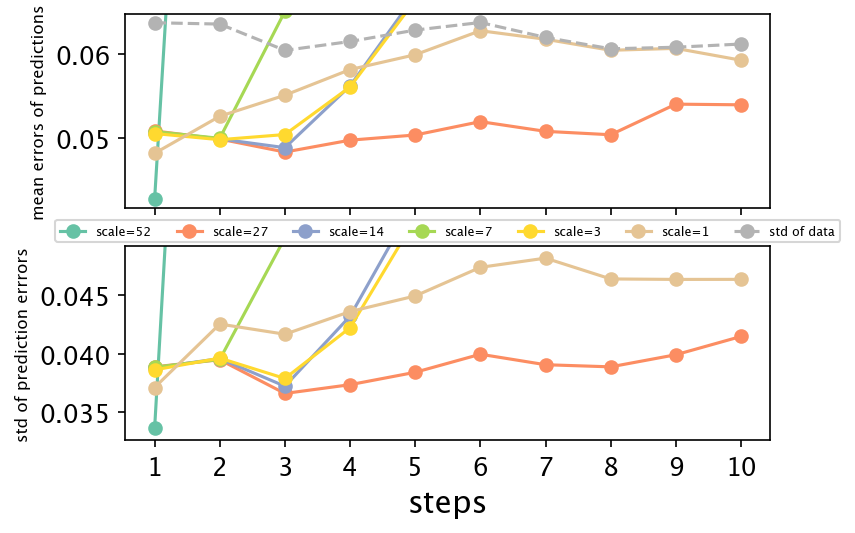

In [18]:
#
cmap=plt.get_cmap('Set2')
colors=cmap(np.linspace(0,1,7))

#
mean_52=np.mean(error_collection_52,(0,1))
#
mean_27=np.mean(error_collection_27,(0,1))
#
mean_14=np.mean(error_collection_14,(0,1))

#
mean_7=np.mean(error_collection_7,(0,1))
#
mean_3=np.mean(error_collection_3,(0,1))
#
mean_1=np.mean(error_collection_1,(0,1))

#
std=np.std(real,(0,1))
std_1=np.std(error_collection_1,(0,1))
std_3=np.std(error_collection_3,(0,1))
std_7=np.std(error_collection_7,(0,1))
std_14=np.std(error_collection_14,(0,1))
std_27=np.std(error_collection_27,(0,1))
std_52=np.std(error_collection_52,(0,1))

# Create a figure and axis object
fig, ax = plt.subplots(2, 1, figsize=(5, 4),dpi=150,sharex=True)

# Plot the data
ax[0].plot(mean_52,marker='o',c=colors[0],label='scale=52')
ax[0].plot(mean_27,marker='o',c=colors[1],label='scale=27')
ax[0].plot(mean_14,marker='o',c=colors[2],label='scale=14')
ax[0].plot(mean_7,marker='o',c=colors[3],label='scale=7')
ax[0].plot(mean_3,marker='o',c=colors[4],label='scale=3')
ax[0].plot(mean_1,marker='o',c=colors[5],label='scale=1')
ax[0].plot(std,marker='o',linestyle='--',c=colors[6],label='std of data')

ax[1].plot(std_52,marker='o',c=colors[0])
ax[1].plot(std_27,marker='o',c=colors[1])
ax[1].plot(std_14,marker='o',c=colors[2])
ax[1].plot(std_7,marker='o',c=colors[3])
ax[1].plot(std_3,marker='o',c=colors[4])
ax[1].plot(std_1,marker='o',c=colors[5])

'''
#
ax.fill_between(range(len(mean_27)), lower_bound_52, upper_bound_52, alpha=0.1,color=colors[5])
ax.fill_between(range(len(mean_27)), lower_bound_27, upper_bound_27, alpha=0.1,color=colors[1])
ax.fill_between(range(len(mean_27)), lower_bound_14, upper_bound_14, alpha=0.1,color=colors[2])
ax.fill_between(range(len(mean_27)), lower_bound_7, upper_bound_7, alpha=0.1,color=colors[3])
ax.fill_between(range(len(mean_27)), lower_bound_3, upper_bound_3, alpha=0.1,color=colors[4])
ax.fill_between(range(len(mean_27)), lower_bound_1, upper_bound_1, alpha=0.2,color=colors[0])
'''
# 添加刻度标签
ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

ax[1].set_xticks(bar_positions)
ax[1].set_xticklabels(scale)

ax[0].set_ylabel('mean errors of predictions',fontsize=8)
ax[0].set_ylim([mean_52.min()-1e-3,std.max()+1e-3])

ax[1].set_xlabel('steps',fontsize=15)
ax[1].set_ylabel('std of prediction errrors',fontsize=8)
ax[1].set_ylim([std_52.min()-1e-3,std_1.max()+1e-3])
#plt.yscale('log')
handles, labels = ax[0].get_legend_handles_labels()
#ax[0].legend(['scale=52','scale=27','scale=14','scale=7','scale=3','scale=1','std of data'],loc='lower right',fontsize=6.5)
ax[1].legend(handles,labels,fontsize=6,loc='center',bbox_to_anchor=(0.5,1.08),ncols=7)

plt.show()

# Intepretation

In [3]:
def encoding_function_1(input_data):
    return net.encoding(input_data)[-1]

In [4]:
#Since we can can how many number of of ROIs we want to investigate in a large range
dataset = datasets.fetch_atlas_schaefer_2018(n_rois=100)
atlas_filename = dataset.maps
labels = dataset.labels
#indices=dataset.indices
description=dataset.description

In [5]:
from captum.attr import IntegratedGradients

In [6]:
#Find out input and target
input=data[:,:-1,:]
target=data[:,1:,:]
#Where we check the integrated gradient
#the data where we check across people
input_mean=input.mean(0)
target_mean=target.mean(0)
#Choose a random time for analysis
time=np.arange(289)
baseline=torch.zeros([100])

In [23]:
'''
fake_sample=torch.randn(input_mean.shape)
ig = IntegratedGradients(encoding_function_1)
attributions, approximation_error = ig.attribute(fake_sample,method='gausslegendre',
                                                 return_convergence_delta=True)
'''

"\nfake_sample=torch.randn(input_mean.shape)\nig = IntegratedGradients(encoding_function_1)\nattributions, approximation_error = ig.attribute(fake_sample,method='gausslegendre',\n                                                 return_convergence_delta=True)\n"

In [7]:
ig = IntegratedGradients(encoding_function_1)
attributions, approximation_error = ig.attribute(input_mean,method='gausslegendre',
                                                 return_convergence_delta=True)

In [25]:
indexes=[]
for label in labels:
    if b'Vis' in label:
        indexes.append(0)
    elif b'SomMot' in label:
        indexes.append(1)
    elif b'DorsAttn' in label:
        indexes.append(2)
    elif b'SalVentAttn' in label:
        indexes.append(3)
    elif b'Limbic' in label:
        indexes.append(4)
    elif b'Cont' in label:
        indexes.append(5)
    elif b'Default' in label:
        indexes.append(6)
indexes=np.array(indexes)

'\nax=sns.violinplot(attributions_mean)\nax.set_xticklabels(subnetworks)\n'

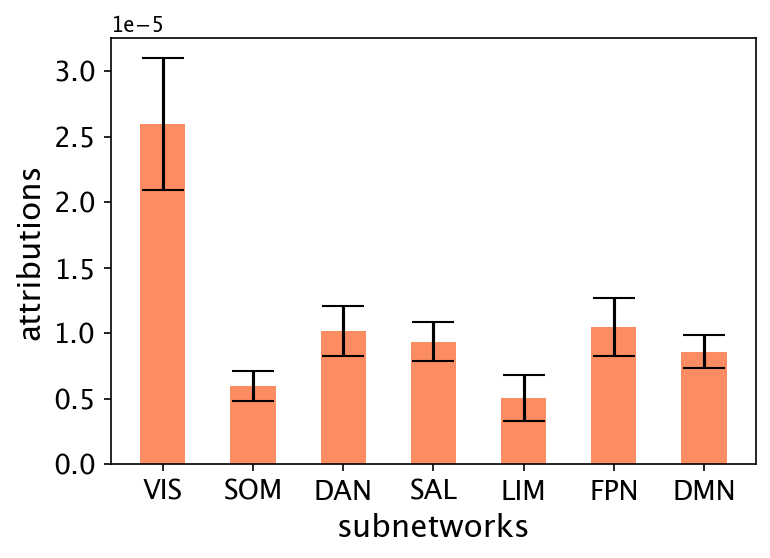

In [26]:
attributions_abs=attributions.abs()
#subnetworks=['Vis','SomMot','DorsAttn','SalVentAttn','Limbic','Cont','Default']
subnetworks=['VIS','SOM','DAN','SAL','LIM','FPN','DMN']
attributions_subnetwork=[attributions_abs[:,indexes==0],
                        attributions_abs[:,indexes==1],
                        attributions_abs[:,indexes==2],
                        attributions_abs[:,indexes==3],
                        attributions_abs[:,indexes==4],
                        attributions_abs[:,indexes==5],
                        attributions_abs[:,indexes==6]]

attributions_mean=[a.mean() for a in attributions_subnetwork]
attributions_std=[sem(a.mean(0)) for a in attributions_subnetwork]

fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)
ax.bar(x=subnetworks,height=attributions_mean,yerr=attributions_std,color=colors[1],width=0.5,capsize=10)
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

plt.xlabel('subnetworks', fontsize=15)
plt.ylabel('attributions', fontsize=15)
"""
ax=sns.violinplot(attributions_mean)
ax.set_xticklabels(subnetworks)
"""

In [8]:
atlas_map=nib.load(atlas_filename)

In [9]:
#100 regions
stat_img=np.zeros(atlas_map.get_fdata().shape)
cmap =mcolors.LinearSegmentedColormap.from_list("n_cmap", ['#F4F1DE', '#DF7A5E'])
attributions_normalize=attributions.abs().mean(0)/attributions.abs().mean(0).sum()
for i in range(100):
    stat_img[atlas_map.get_fdata()==i+1]=attributions_normalize[i]

In [10]:
stat_img=nib.Nifti1Image(stat_img,atlas_map.affine)

In [30]:
plotting.view_img_on_surf(stat_img,cmap=plt.cm.Reds,vmin=0,symmetric_cmap=False)

In [31]:
#100 regions
"""
attributions_collection=np.load('Attributions_NIS+.npy')
attribution_collection_abs=np.abs(attributions_collection)
attributions_subnetwork=[attribution_collection_abs[:,indexes==0].flatten(),
                        attribution_collection_abs[:,indexes==1].flatten(),
                        attribution_collection_abs[:,indexes==2].flatten(),
                        attribution_collection_abs[:,indexes==3].flatten(),
                        attribution_collection_abs[:,indexes==4].flatten(),
                        attribution_collection_abs[:,indexes==5].flatten(),
                        attribution_collection_abs[:,indexes==6].flatten()]
stat_img=np.zeros(atlas_map.get_fdata().shape)
sum=np.sum(attributions_mean)
for i in range(100):
    if indexes[i]==0:
        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[0]/sum
    elif indexes[i]==1:
        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[1]/sum
    elif indexes[i]==2:
        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[2]/sum
    elif indexes[i]==3:
        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[3]/sum
    elif indexes[i]==4:
        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[4]/sum
    elif indexes[i]==5:
        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[5]/sum
    elif indexes[i]==6:
        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[6]/sum
        
attributions_mean=[a.mean(0) for a in attributions_subnetwork]
attributions_std=[a.std(0) for a in attributions_subnetwork]

fig, ax = plt.subplots()
ax.bar(x=subnetworks,height=attributions_mean,yerr=attributions_std,color=colors[0],width=0.5)

ax=sns.violinplot(attributions_mean)
ax.set_xticklabels(subnetworks);
"""

"\nattributions_collection=np.load('Attributions_NIS+.npy')\nattribution_collection_abs=np.abs(attributions_collection)\nattributions_subnetwork=[attribution_collection_abs[:,indexes==0].flatten(),\n                        attribution_collection_abs[:,indexes==1].flatten(),\n                        attribution_collection_abs[:,indexes==2].flatten(),\n                        attribution_collection_abs[:,indexes==3].flatten(),\n                        attribution_collection_abs[:,indexes==4].flatten(),\n                        attribution_collection_abs[:,indexes==5].flatten(),\n                        attribution_collection_abs[:,indexes==6].flatten()]\nstat_img=np.zeros(atlas_map.get_fdata().shape)\nsum=np.sum(attributions_mean)\nfor i in range(100):\n    if indexes[i]==0:\n        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[0]/sum\n    elif indexes[i]==1:\n        stat_img[atlas_map.get_fdata()==i+1]=attributions_mean[1]/sum\n    elif indexes[i]==2:\n        stat_img[atlas_

In [32]:
num=8

In [33]:
important_labels=attributions.abs().mean(0).argsort()[-num:].flip(0)
unimportant_labels=attributions.abs().mean(0).argsort()[:num]

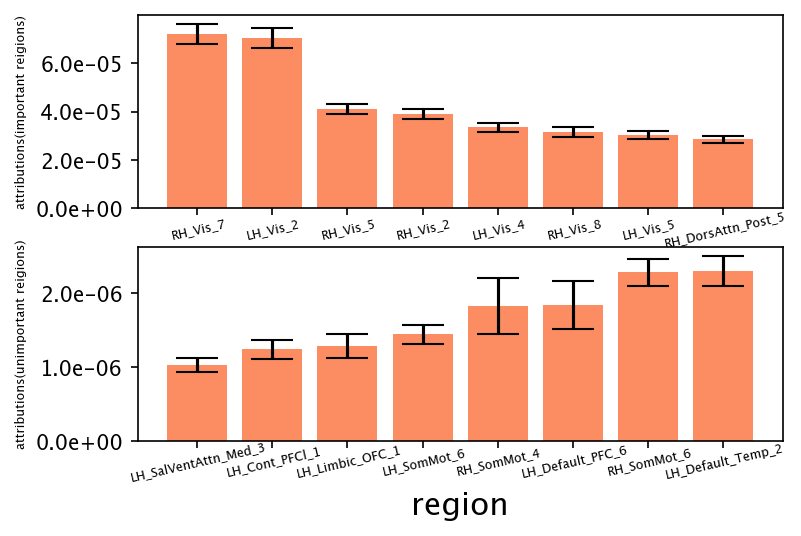

In [34]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(2,1, figsize=(5, 4),dpi=150)
ax[0].bar(np.arange(num),attributions.abs().mean(0)[important_labels],color=colors[1],yerr=sem(attributions.abs()[:,important_labels]),capsize=10)
ax[0].set_xticks(np.arange(num),[str(labels[i])[12:-1] for i in important_labels],wrap=True,size=6,rotation=13)
ax[0].set_ylabel('attributions(important reigions)',fontsize=6)
#plt.title('Important Features(regions) across subjects and time')
#plt.xlabel('features')
#plt.ylabel('attributions')
ax[1].bar(np.arange(num),attributions.abs().mean(0)[unimportant_labels],color=colors[1],yerr=sem(attributions.abs()[:,unimportant_labels]),capsize=10)
ax[1].set_xticks(np.arange(num),[str(labels[i])[12:-1] for i in unimportant_labels],wrap=True,size=6,rotation=13)
ax[1].set_ylabel('attributions(unimportant reigions)',fontsize=6)
#plt.margins(0.2)
#plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
formatter = FormatStrFormatter('%.1e')
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)
#plt.title('UnImportant Features across subjects and time(regions)')
plt.xlabel('region',fontsize=15)
#plt.ylabel('attributions')
plt.show()

In [35]:
'''
fig, ax = plt.subplots()
for i in range(5):
    important_data=data.mean(0)[:,important_labels[i]]
    important_data=(important_data-important_data.mean())/important_data.std()
    ax.plot(important_data.detach().numpy(),c=colors[0],label='micro_important')
    unimportant_data=data.mean(0)[:,unimportant_labels[-i]]
    unimportant_data=(unimportant_data-unimportant_data.mean())/unimportant_data.std()
    ax.plot(unimportant_data.detach().numpy(),c=colors[1],label='micro_unimportant')
macro=net.encoding(data.mean(0))[-1]
macro_normalize=(macro-macro.mean())/macro.std()
ax.plot(macro_normalize.detach().numpy(),c=colors[2],label='macro')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[0],handles[1],handles[-1]], labels=[labels[0],labels[1],labels[-1]])
plt.show()
'''

"\nfig, ax = plt.subplots()\nfor i in range(5):\n    important_data=data.mean(0)[:,important_labels[i]]\n    important_data=(important_data-important_data.mean())/important_data.std()\n    ax.plot(important_data.detach().numpy(),c=colors[0],label='micro_important')\n    unimportant_data=data.mean(0)[:,unimportant_labels[-i]]\n    unimportant_data=(unimportant_data-unimportant_data.mean())/unimportant_data.std()\n    ax.plot(unimportant_data.detach().numpy(),c=colors[1],label='micro_unimportant')\nmacro=net.encoding(data.mean(0))[-1]\nmacro_normalize=(macro-macro.mean())/macro.std()\nax.plot(macro_normalize.detach().numpy(),c=colors[2],label='macro')\nhandles, labels = ax.get_legend_handles_labels()\nax.legend(handles=[handles[0],handles[1],handles[-1]], labels=[labels[0],labels[1],labels[-1]])\nplt.show()\n"

In [36]:
important_labels=attributions.abs().mean(0).argsort().flip(0)

In [37]:
color_values = np.linspace(0, 1, 100)
colors_Red = plt.cm.Reds(color_values)
colors_Blues= plt.cm.Blues(color_values)

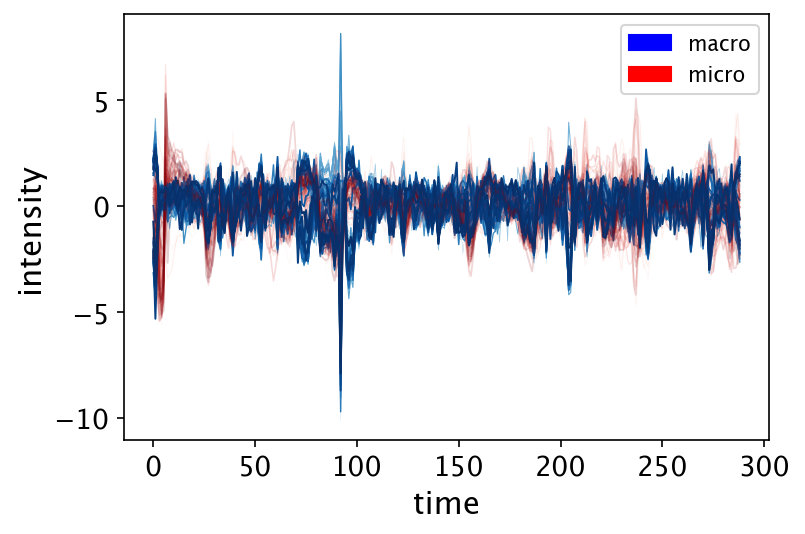

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)

#macro=net.encoding(data.mean(0))[-1]
macro=net(data.mean(0))[0][-1]
#macro_normalize=(macro-macro.mean())/macro.std()
#ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)

for i in range(100):
    important_data=data.mean(0)[:,important_labels[i]]
    macro_data=macro[:,important_labels[i]]
    macro_data=(macro_data-macro_data.mean())/macro_data.std()
    important_data=(important_data-important_data.mean())/important_data.std()
    ax.plot(important_data[1:].detach().numpy(),label='micro',alpha=0.2*color_values[i],linewidth=color_values[i],color=colors_Red[i])
    ax.plot(macro_data[:-1].detach().numpy(),label='macro',linewidth=color_values[i],color=colors_Blues[i])
    
handles, labels = ax.get_legend_handles_labels()
# 创建自定义图例项
legend_item1 = mpatches.Patch(color='blue', label='macro')
legend_item2 = mpatches.Patch(color='red', label='micro')

# 将图例项添加到图例中
ax.legend(handles=[legend_item1, legend_item2])
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
plt.xlabel('time',fontsize=15)
plt.ylabel('intensity',fontsize=15)
#ax.legend(handles=[handles[0],handles[-1]], labels=[labels[0],labels[-1]])
plt.show()

In [39]:
"""
num=3
fig, ax = plt.subplots(num, 2, figsize=(6, 4),dpi=150,sharex=True)

#macro=net.encoding(data.mean(0))[-1]
macro=net(data.mean(0))[0][-1]
#macro_normalize=(macro-macro.mean())/macro.std()
#ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)

for i in range(num):
    important_data=data.mean(0)[:,important_labels[i]]
    macro_data=macro[:,important_labels[i]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[i,0].plot(important_data[1:].detach().numpy(),label='micro',color='red')
    ax[i,0].plot(macro_data[:-1].detach().numpy(),label='macro',color='blue')
    #ax[i,0].set_yticks([])
    
for i in range(num):
    important_data=data.mean(0)[:,important_labels[-i-1]]
    macro_data=macro[:,important_labels[-i-1]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[i,1].plot(important_data[1:].detach().numpy(),label='micro',color='red')
    ax[i,1].plot(macro_data[:-1].detach().numpy(),label='macro',color='blue')
    #ax[i,1].set_yticks([])
 
for i in range(num):
    ax[i,0].tick_params(labelsize=10)   
    ax[i,1].tick_params(labelsize=10)  
fig.text(0.48,0,'time',fontsize=15)
ax[1,0].set_ylabel('intensity',fontsize=15,loc='center')

'''    
handles, labels = ax[0].get_legend_handles_labels()
# 创建自定义图例项
legend_item1 = mpatches.Patch(color='blue', label='macro')
legend_item2 = mpatches.Patch(color='red', label='micro')

# 将图例项添加到图例中
ax.legend(handles=[legend_item1, legend_item2])
'''    
ax[1,1].legend(['micro', 'macro-decode'],loc='upper right',fontsize=6)

plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
#ax.legend(handles=[handles[0],handles[-1]], labels=[labels[0],labels[-1]])
plt.tight_layout()
plt.show()
"""

"\nnum=3\nfig, ax = plt.subplots(num, 2, figsize=(6, 4),dpi=150,sharex=True)\n\n#macro=net.encoding(data.mean(0))[-1]\nmacro=net(data.mean(0))[0][-1]\n#macro_normalize=(macro-macro.mean())/macro.std()\n#ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)\n\nfor i in range(num):\n    important_data=data.mean(0)[:,important_labels[i]]\n    macro_data=macro[:,important_labels[i]]\n    #macro_data=(macro_data-macro_data.mean())/macro_data.std()\n    #important_data=(important_data-important_data.mean())/important_data.std()\n    ax[i,0].plot(important_data[1:].detach().numpy(),label='micro',color='red')\n    ax[i,0].plot(macro_data[:-1].detach().numpy(),label='macro',color='blue')\n    #ax[i,0].set_yticks([])\n    \nfor i in range(num):\n    important_data=data.mean(0)[:,important_labels[-i-1]]\n    macro_data=macro[:,important_labels[-i-1]]\n    #macro_data=(macro_data-macro_data.mean())/macro_data.std()\n    #important_data=(important_data-important_data.mean())/important

In [51]:
num=8
fig, ax = plt.subplots(2,1, figsize=(5, 4),dpi=150,sharex=True)
colors = ['#F4F1DE','#DF7A5E','#3C405B','#32CD32','#F2CC8E']
#macro=net.encoding(data.mean(0))[-1]
macro=net(data.mean(0))[0][-1]
#macro_normalize=(macro-macro.mean())/macro.std()
#ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)


for i in range(num):
    important_data=data.mean(0)[:,important_labels[i]]
    macro_data=macro[:,important_labels[i]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[0].plot(important_data[1:].detach().numpy()+i*0.12,label='micro',color=colors[1])
    ax[0].plot(macro_data[:-1].detach().numpy()+i*0.12,label='macro',color=colors[3])
    #ax[i,0].set_yticks([])

for i in range(num):
    important_data=data.mean(0)[:,important_labels[-i-1]]
    macro_data=macro[:,important_labels[-i-1]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[1].plot(important_data[1:].detach().numpy()+i*0.12,label='micro',color=colors[1])
    ax[1].plot(macro_data[:-1].detach().numpy()+i*0.12,label='macro',color=colors[3])
    #ax[i,1].set_yticks([])


tick_loc=np.arange(0,0.2+0.12*(num-2),0.12)
nums=np.arange(1,num+1)
#region_labels_important=region_labels[0:num]
#region_labels_important=['I'+str(nums[i]) for i in range(num)]
ax[0].set_yticks(tick_loc)
#ax[0].set_yticklabels(region_labels_important)


#region_labels_unimportant=region_labels[-num:]
#region_labels_unimportant=['U'+str(nums[i]) for i in range(num)]
ax[1].set_yticks(tick_loc)
#ax[1,1].set_yticklabels([])
#ax[1].set_yticklabels(region_labels_unimportant)


ax[0].set_ylabel('important regions',fontsize=10)
ax[1].set_ylabel('unimportant regions',fontsize=10)
 


handles, label = ax[1].get_legend_handles_labels()
"""
# 创建自定义图例项
legend_item1 = mpatches.Patch(color='blue', label='macro')
legend_item2 = mpatches.Patch(color='red', label='micro')
"""

# 将图例项添加到图例中

ax[0].tick_params(labelsize=13)   
ax[1].tick_params(labelsize=13)  

ax[0].set_yticklabels(np.arange(1,9),fontsize=8)
ax[1].set_yticklabels(np.arange(1,9),fontsize=8)

plt.xlabel('time',fontsize=15)

plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
#plt.legend(handles=[handles[0],handles[-1]], labels=['micro','macro-prediction'],bbox_to_anchor=(1, -0.3),fontsize=10)
plt.legend(handles=[handles[0],handles[-1]], loc='lower right',labels=['micro','macro-prediction'],fontsize=10)
plt.tight_layout()
plt.show()

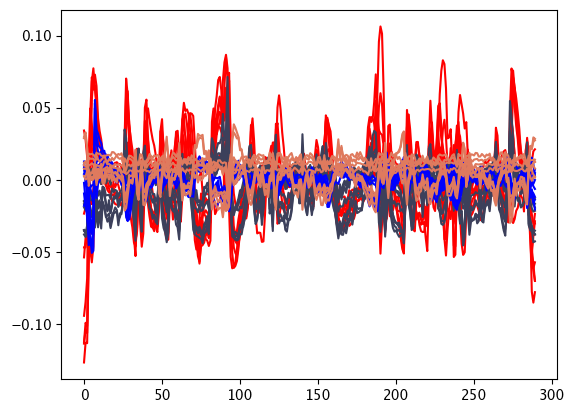

In [52]:
plt.plot(data.mean(0)[:,important_labels[:num]].detach().numpy(),color='red')
plt.plot(macro[:,important_labels[:num]].detach().numpy(),color=colors[2])
plt.plot(data.mean(0)[:,important_labels[-num:]].detach().numpy(),color='blue')
plt.plot(macro[:,important_labels[-num:]].detach().numpy(),color=colors[1])

100%|██████████| 30/30 [00:15<00:00,  1.90it/s]


In [50]:
"""
#Prepare for the macro data
test_data=data[-30:,:,:]
macro=torch.zeros(test_data.shape)
for i in tqdm(range(test_data.shape[0])):
    #
        macro[i,:,:]=net(test_data[i])[0][-1]

num=8
important_labels=attributions.abs().mean(0).argsort().flip(0)
fig, ax = plt.subplots(2,1, figsize=(5, 4),dpi=150,sharex=True)
colors = ['#F4F1DE','#DF7A5E','#3C405B','#32CD32','#F2CC8E']
#macro=net.encoding(data.mean(0))[-1]
#macro=net(data.mean(0))[0][-1]
#macro_normalize=(macro-macro.mean())/macro.std()
#ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)


for i in range(num):
    important_data=test_data.mean(0)[:,important_labels[i]]
    macro_data=macro.mean(0)[:,important_labels[i]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[0].plot(important_data[1:].detach().numpy()+i*0.12,label='micro',color=colors[1])
    ax[0].plot(macro_data[:-1].detach().numpy()+i*0.12,label='macro',color=colors[3])
    #ax[i,0].set_yticks([])

for i in range(num):
    important_data=test_data.mean(0)[:,important_labels[-i-1]]
    macro_data=macro.mean(0)[:,important_labels[-i-1]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[1].plot(important_data[1:].detach().numpy()+i*0.12,label='micro',color=colors[1])
    ax[1].plot(macro_data[:-1].detach().numpy()+i*0.12,label='macro',color=colors[3])
    #ax[i,1].set_yticks([])


tick_loc=np.arange(0,0.2+0.12*(num-2),0.12)
nums=np.arange(1,num+1)
#region_labels_important=region_labels[0:num]
#region_labels_important=['I'+str(nums[i]) for i in range(num)]
ax[0].set_yticks(tick_loc)
#ax[0].set_yticklabels(region_labels_important)


#region_labels_unimportant=region_labels[-num:]
#region_labels_unimportant=['U'+str(nums[i]) for i in range(num)]
ax[1].set_yticks(tick_loc)
#ax[1,1].set_yticklabels([])
#ax[1].set_yticklabels(region_labels_unimportant)


ax[0].set_ylabel('important regions',fontsize=10)
ax[1].set_ylabel('unimportant regions',fontsize=10)
 


handles, label = ax[1].get_legend_handles_labels()
"""
# 创建自定义图例项
legend_item1 = mpatches.Patch(color='blue', label='macro')
legend_item2 = mpatches.Patch(color='red', label='micro')
"""

# 将图例项添加到图例中

ax[0].tick_params(labelsize=13)   
ax[1].tick_params(labelsize=13)  

ax[0].set_yticklabels(np.arange(1,num+1),fontsize=8)
ax[1].set_yticklabels(np.arange(1,num+1),fontsize=8)

plt.xlabel('time',fontsize=15)

plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
#plt.legend(handles=[handles[0],handles[-1]], labels=['micro','macro-prediction'],bbox_to_anchor=(1, -0.3),fontsize=10)
plt.legend(handles=[handles[0],handles[-1]], loc='lower right',labels=['micro','macro-prediction'],fontsize=10)
plt.tight_layout()
plt.show()
"""

"\n\n# 将图例项添加到图例中\n\nax[0].tick_params(labelsize=13)   \nax[1].tick_params(labelsize=13)  \n\nax[0].set_yticklabels(np.arange(1,num+1),fontsize=8)\nax[1].set_yticklabels(np.arange(1,num+1),fontsize=8)\n\nplt.xlabel('time',fontsize=15)\n\nplt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,\n                    wspace=0.25, hspace=0.2)\n#plt.legend(handles=[handles[0],handles[-1]], labels=['micro','macro-prediction'],bbox_to_anchor=(1, -0.3),fontsize=10)\nplt.legend(handles=[handles[0],handles[-1]], loc='lower right',labels=['micro','macro-prediction'],fontsize=10)\nplt.tight_layout()\nplt.show()\n"

In [49]:
'''
plt.plot(test_data.mean(0)[:,important_labels[:num]].detach().numpy(),color='red')
plt.plot(macro.mean(0)[:,important_labels[:num]].detach().numpy(),color=colors[2])
plt.plot(data.mean(0)[:,important_labels[-num:]].detach().numpy(),color='blue')
plt.plot(macro.mean(0)[:,important_labels[-num:]].detach().numpy(),color=colors[1])
plt.show()
'''

"\nplt.plot(test_data.mean(0)[:,important_labels[:num]].detach().numpy(),color='red')\nplt.plot(macro.mean(0)[:,important_labels[:num]].detach().numpy(),color=colors[2])\nplt.plot(data.mean(0)[:,important_labels[-num:]].detach().numpy(),color='blue')\nplt.plot(macro.mean(0)[:,important_labels[-num:]].detach().numpy(),color=colors[1])\nplt.show()\n"

In [ ]:
attribution_collection=np.load('Attributions_NIS+.npy')
attribution_collection=attribution_collection.reshape(data.shape)
attribution_collection=np.abs(attribution_collection)

In [ ]:
attribution_collection=attribution_collection/attribution_collection.sum(2)[:,:,np.newaxis]

In [ ]:
attributions_abs=attribution_collection.mean(1)

In [ ]:
#attributions_abs=attributions.abs()
#subnetworks=['Vis','SomMot','DorsAttn','SalVentAttn','Limbic','Cont','Default']
subnetworks=['VIS','SOM','DAN','SAL','LIM','FPN','DMN']
attributions_subnetwork=[attributions_abs[:,indexes==0],
                        attributions_abs[:,indexes==1],
                        attributions_abs[:,indexes==2],
                        attributions_abs[:,indexes==3],
                        attributions_abs[:,indexes==4],
                        attributions_abs[:,indexes==5],
                        attributions_abs[:,indexes==6]]

attributions_mean=[a.mean() for a in attributions_subnetwork]
attributions_std=[sem(a.mean(0)) for a in attributions_subnetwork]

fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)
ax.bar(x=subnetworks,height=attributions_mean,yerr=attributions_std,color=colors[1],width=0.5,capsize=10)
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

plt.xlabel('subnetworks', fontsize=15)
plt.ylabel('attributions', fontsize=15)
"""
ax=sns.violinplot(attributions_mean)
ax.set_xticklabels(subnetworks)
"""

In [ ]:
"""
important_labels=attributions.abs().mean(0).argsort().flip(0)
fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150,sharex=True,sharey=True)

#macro=net.encoding(data.mean(0))[-1]
macro=net(data.mean(0))[0][-1]
macro=macro[:,important_labels]
macro_data=((macro-macro.mean(0))/macro.std(0))

important=data.mean(0)
important=important[:,important_labels]
important_data=((important-important.mean(0))/important.std(0))

#macro_normalize=(macro-macro.mean())/macro.std()
#ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)

#ax[0].imshow(important_data[1:,:].detach().numpy().transpose(),label='micro',cmap=plt.cm.Reds)
#ax[1].imshow(macro_data[:-1,:].detach().numpy().transpose(),label='macro',cmap=plt.cm.Blues)
#diff=important[1:,:].detach().numpy().transpose()-macro[:-1,:].detach().numpy().transpose()
#sns.heatmap(diff,label='macro',cmap="coolwarm",cbar=True)
diff=np.abs(important[1:,:].detach().numpy().transpose()-macro[:-1,:].detach().numpy().transpose())
sns.heatmap(diff,label='macro',cmap="Reds",cbar=True)


  
#handles, labels = ax.get_legend_handles_labels()
# 创建自定义图例项
#legend_item1 = mpatches.Patch(color='blue', label='macro')
#legend_item2 = mpatches.Patch(color='red', label='micro')

# 将图例项添加到图例中
#ax.legend(handles=[legend_item1, legend_item2])
plt.tick_params(labelsize=13)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
plt.xlabel('time',fontsize=15)
plt.ylabel('regions',fontsize=15)
#ax.legend(handles=[handles[0],handles[-1]], labels=[labels[0],labels[-1]])
plt.show()
"""

In [ ]:
"""
fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)

#macro=net.encoding(data.mean(0))[-1]
#macro=net(data.mean(0))[0][-1]
macro=net.dynamics_modules[-1](net.encoding(data.mean(0))[-1])
macro_normalize=(macro-macro.mean())/macro.std()
ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)

for i in range(100):
    important_data=data.mean(0)[:,important_labels[i]]
    #macro_data=macro_normalize[:,important_labels[i]]
    important_data=(important_data-important_data.mean())/important_data.std()
    ax.plot(important_data[1:].detach().numpy(),label='micro',alpha=0.2*color_values[i],linewidth=color_values[i],color=colors_Red[i])
    #ax.plot(macro_data[:-1].detach().numpy(),label='macro',linewidth=color_values[i],color=colors_Grey[i])
    
handles, labels = ax.get_legend_handles_labels()
# 创建自定义图例项
legend_item1 = mpatches.Patch(color='blue', label='macro')
legend_item2 = mpatches.Patch(color='red', label='micro')

# 将图例项添加到图例中
ax.legend(handles=[legend_item1, legend_item2])
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
plt.xlabel('time',fontsize=15)
plt.ylabel('intensity',fontsize=15)
#ax.legend(handles=[handles[0],handles[-1]], labels=[labels[0],labels[-1]])
plt.show()
"""

In [ ]:
"""
input=data.reshape(-1,data.shape[-1])
indexes=np.random.choice(input.shape[0],50000,replace=False)
macro_data=net.encoding(input[indexes,:])[-1]
print(macro_data.min())
print(macro_data.max())
"""

In [ ]:
#Visulization of encoding function
'''
colors = sns.color_palette('pastel', n_colors=3)
x=torch.linspace(0.001334,.001335,50).view(-1,1)
#x=torch.linspace(0.00133431596,0.00133431600,1000).view(-1,1)
y1=net.dynamics_modules[-1](x)
y2=net.dynamics_modules[-1](y1)
y3=net.dynamics_modules[-1](y2)
y4=net.dynamics_modules[-1](y3)
y5=net.dynamics_modules[-1](y4)
y6=net.dynamics_modules[-1](y5)

fig, axs=plt.subplots(1,1)

axs.plot(x[:,0].detach().numpy(),y1[:,0].detach().numpy(),color=colors[0],marker='o',linestyle='--')
axs.plot(x[:,0].detach().numpy(),x[:,0].detach().numpy(),color=colors[1])
#axs[1].plot(y1[:,0].detach().numpy(),y2[:,0].detach().numpy())
#axs[2].plot(y3[:,0].detach().numpy(),y4[:,0].detach().numpy())
#axs[3].plot(y4[:,0].detach().numpy(),y5[:,0].detach().numpy())
#axs[4].plot(y5[:,0].detach().numpy(),y6[:,0].detach().numpy())
'''

In [ ]:
"""
#Visulization of encoding function
colors = ['#F4F1DE','#DF7A5E','#3C405B','#82B29A','#F2CC8E']
x=torch.linspace(0.001334305,.00133432,40).view(-1,1)
#x=torch.linspace(0.00133431596,0.00133431600,1000).view(-1,1)
y1=net.dynamics_modules[-1](x)
y1=y1+x
y2=net.dynamics_modules[-1](y1)
y3=net.dynamics_modules[-1](y2)
y4=net.dynamics_modules[-1](y3)
y5=net.dynamics_modules[-1](y4)
y6=net.dynamics_modules[-1](y5)

fig, axs=plt.subplots(1,1,figsize=(5,4))

axs.plot(x[:,0].detach().numpy(),y1[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
#axs.plot(x[:,0].detach().numpy(),x[:,0].detach().numpy(),color=colors[4])
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
#plt.xlabel('time',fontsize=15)
#plt.ylabel('Intensity',fontsize=15)
#plt.xlabel('$y_t$');
#plt.ylabel('y_{t+1}');
#axs[1].plot(y1[:,0].detach().numpy(),y2[:,0].detach().numpy())
#axs[2].plot(y3[:,0].detach().numpy(),y4[:,0].detach().numpy())
#axs[3].plot(y4[:,0].detach().numpy(),y5[:,0].detach().numpy())
#axs[4].plot(y5[:,0].detach().numpy(),y6[:,0].detach().numpy())
plt.show()
"""

In [ ]:
"""
#Visulization of encoding function

x=torch.linspace(-0.033,-0.02,40).view(-1,1)
#x=torch.linspace(-1,1,100).view(-1,1)
#x=torch.linspace(0.00133431596,0.00133431600,1000).view(-1,1)
y1=net.dynamics_modules[-1](x)
y1=y1+x
y2=net.dynamics_modules[-1](y1)
y3=net.dynamics_modules[-1](y2)
y4=net.dynamics_modules[-1](y3)
y5=net.dynamics_modules[-1](y4)
y6=net.dynamics_modules[-1](y5)
#x=(x-x.mean())/x.std()
#y1=(y1-y1.mean())/y1.std()

fig, ax=plt.subplots(1,1)

#ax[0].plot(x[:,0].detach().numpy(),y1[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
ax.plot(x[:,0].detach().numpy(),y1[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
ax.plot(x[:,0].detach().numpy(),x[:,0].detach().numpy(),color=colors[4])
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
#ax.set_xlabel('$y_t$')
#ax.set_ylabel('$y_{t+1}$')
#axs.plot(x[:,0].detach().numpy(),x[:,0].detach().numpy(),color=colors[1])
#ax[1].plot(y1[:,0].detach().numpy(),y2[:,0].detach().numpy())
#ax[2].plot(y3[:,0].detach().numpy(),y4[:,0].detach().numpy())
#ax[3].plot(y4[:,0].detach().numpy(),y5[:,0].detach().numpy())
#ax[4].plot(y5[:,0].detach().numpy(),y6[:,0].detach().numpy())
"""

In [ ]:
"""
#Visulization of encoding function

#x=torch.linspace(-0.033,-0.02,40).view(-1,1)
x=torch.linspace(-0.028,-0.0225,40).view(-1,1)

#x=torch.linspace(-1,1,100).view(-1,1)
#x=torch.linspace(0.00133431596,0.00133431600,1000).view(-1,1)
y1=net.dynamics_modules[-1](x)
y1=y1+x
y2=net.dynamics_modules[-1](y1)
y2=y2+y1
y3=net.dynamics_modules[-1](y2)
y3=y3+y2
y4=net.dynamics_modules[-1](y3)
y4=y4+y3
y5=net.dynamics_modules[-1](y4)
y5=y5+y4
y6=net.dynamics_modules[-1](y5)
y6=y6+y5
#x=(x-x.mean())/x.std()
#y1=(y1-y1.mean())/y1.std()

fig, axs=plt.subplots(5,1)

axs[0].plot(x[:,0].detach().numpy(),y1[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
#ax.plot(x[:,0].detach().numpy(),y1[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
#ax.plot(x[:,0].detach().numpy(),-x[:,0].detach().numpy(),color=colors[4])
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
#ax.set_xlabel('$y_t$')
#ax.set_ylabel('$y_{t+1}$')
#axs.plot(x[:,0].detach().numpy(),x[:,0].detach().numpy(),color=colors[1])
axs[1].plot(y1[:,0].detach().numpy(),y2[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
axs[2].plot(y3[:,0].detach().numpy(),y4[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
axs[3].plot(y4[:,0].detach().numpy(),y5[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
axs[4].plot(y5[:,0].detach().numpy(),y6[:,0].detach().numpy(),color=colors[3],marker='o',linestyle='--')
"""

In [ ]:
"""
x=torch.linspace(-0.033,-0.02,40).view(-1,1)
x1=x
for i in range(100):
    y=net.dynamics_modules[-1](x1)
    x1=x1+y
    if i%20==0:
        plt.plot(x.detach().numpy(),x1.detach().numpy(),label='Iteration times:'+' '+str(i))

plt.legend()
"""

In [ ]:
"""
colors = ['#F4F1DE','#DF7A5E','#3C405B','#82B29A','#F2CC8E']
input=data.reshape(-1,data.shape[-1])
indexes=np.random.choice(input.shape[0],30000,replace=False)
macro_data=net.encoding(input[indexes,:])[-1]

macro_data_next=net.dynamics_modules[-1](macro_data)
macro_data_next=macro_data_next+macro_data

fig, ax=plt.subplots(1,1,figsize=(5,4))
ax.hist(macro_data.detach().numpy(),color=colors[0],bins=500,label='t',density=True);
ax.hist(macro_data_next.detach().numpy(),color=colors[1],bins=500,label='t+1',density=True);
plt.xlim([-0.028,-0.0225])
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
plt.xlabel('y',fontsize=15)
plt.ylabel('density',fontsize=15)
plt.legend()
plt.show()
"""

In [ ]:
#Attribution Calculation
"""
ig = IntegratedGradients(encoding_function_1)
attributions_collection=torch.zeros([input.shape[0],data.shape[2]])
for i in tqdm(range(input.shape[0])):
    attributions, approximation_error = ig.attribute(input[i,:].view(1,-1),method='gausslegendre',
                                                 return_convergence_delta=True)
    attributions_collection[i,:]=attributions1
"""